# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

#### Data Set Information:

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)

8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)



In [1]:
# suppress future warning ?
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
data.sample(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
4,22615,5410,7198,3915,1777,5185
225,12680,3243,4157,660,761,786
211,12119,28326,39694,4736,19410,2870
231,2344,10678,3828,1439,1566,490
404,18073,4613,3444,4324,914,715


In [4]:
# data dimensions
data.shape

(440, 6)

In [5]:
# data type information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [6]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [7]:
#### TODO: Select three indices of your choice you wish to sample from the dataset

### Chosen indices from sample:[ 52 183  58]
indices = [86, 181, 325]

#### Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices],
                       columns = data.keys()).reset_index(drop = True)


print("Chosen indices from sample:{}".format(indices))

print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen indices from sample:[86, 181, 325]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22925,73498,32114,987,20070,903
1,112151,29627,18148,16745,4948,8550
2,32717,16784,13626,60869,1272,5609


In [8]:
# Sample descriptive statistics
samples.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,55931.000000,39969.666667,21296.000000,26200.333333,8763.333333,5020.666667
std,48933.496871,29737.981006,9637.632697,31040.553754,9962.869935,3857.298839
min,22925.000000,16784.000000,13626.000000,987.000000,1272.000000,903.000000
25%,27821.000000,23205.500000,15887.000000,8866.000000,3110.000000,3256.000000
50%,32717.000000,29627.000000,18148.000000,16745.000000,4948.000000,5609.000000
75%,72434.000000,51562.500000,25131.000000,38807.000000,12509.000000,7079.500000
max,112151.000000,73498.000000,32114.000000,60869.000000,20070.000000,8550.000000


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

In [9]:
three_samples_description = samples.describe()
three_samples_description

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,55931.000000,39969.666667,21296.000000,26200.333333,8763.333333,5020.666667
std,48933.496871,29737.981006,9637.632697,31040.553754,9962.869935,3857.298839
min,22925.000000,16784.000000,13626.000000,987.000000,1272.000000,903.000000
25%,27821.000000,23205.500000,15887.000000,8866.000000,3110.000000,3256.000000
50%,32717.000000,29627.000000,18148.000000,16745.000000,4948.000000,5609.000000
75%,72434.000000,51562.500000,25131.000000,38807.000000,12509.000000,7079.500000
max,112151.000000,73498.000000,32114.000000,60869.000000,20070.000000,8550.000000


In [10]:
# choosing mean from above
three_samples_description_mean = three_samples_description.loc['mean']
three_samples_description_mean

Fresh               55931.000000
Milk                39969.666667
Grocery             21296.000000
Frozen              26200.333333
Detergents_Paper     8763.333333
Delicatessen         5020.666667
Name: mean, dtype: float64

In [11]:
# appending mean to dataframe 'sample'
three_samples_description_mean = samples.append(three_samples_description_mean)
three_samples_description_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22925.0,73498.000000,32114.0,987.000000,20070.000000,903.000000
1,112151.0,29627.000000,18148.0,16745.000000,4948.000000,8550.000000
2,32717.0,16784.000000,13626.0,60869.000000,1272.000000,5609.000000
mean,55931.0,39969.666667,21296.0,26200.333333,8763.333333,5020.666667


''

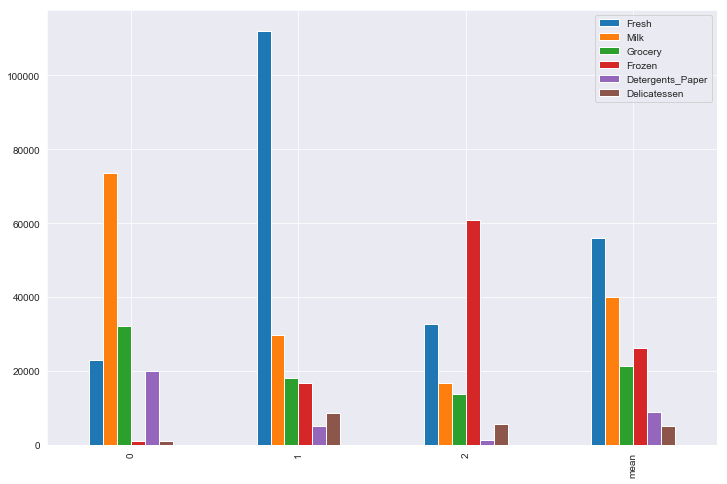

In [12]:
# plotting comparative graph
three_samples_description_mean.plot(kind='bar', figsize=(12,8))
;

#### First sample customer:
   - This could be Coffee shop as its annual spending monetary units on 'Milk' and 'Grocery' is above mean and at the same time spending on 'Fresh', 'Frozen' and 'Delicatessen' less than mean.


#### Second sample customer:
   - This could be big Supercenter store as its annual spending monetary units on 'Fresh' and 'Delicatessen'  is above mean and at the same time spending on  'Milk' 'Frozen'  and Grocery close to mean.


#### Third sample customer:
   - This could be Deli shop as its annual spending monetary units on 'Frozen', 'Delicatessen' are above mean and close to average(below) spending on  ''Milk' and 'Grocery' and 'Delicatessen' including 'Detergents_Paper'. It is like a small neighborhood store where one can buy almost all items. 


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [13]:
from sklearn.model_selection import train_test_split

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data[['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]

# I am choosing feature 'Fresh'
labels = data[['Fresh']]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                    labels,
                                                    test_size=0.25,
                                                    random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

-0.2524698076882732


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* Which feature did you attempt to predict? 
    - I tried to predict 'Fresh' feature from the given "Wholesale customers Data Set"


* What was the reported prediction score? 
    - The negative value of -0.2524698076882732, outside 0 and 1,  suggest that seleted model 'DecisionTreeRegressor'  failed to fit the data. Further investigation is required.



* Is this feature necessary for identifying customers' spending habits?
    - The negative score fails the model so we do not know if feature 'Fresh' is has any correlation with other features namely 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'.I will not give up on feature  'Fresh' and keep it for further investigation.


#### Reference:
- https://en.wikipedia.org/wiki/Coefficient_of_determination
- https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

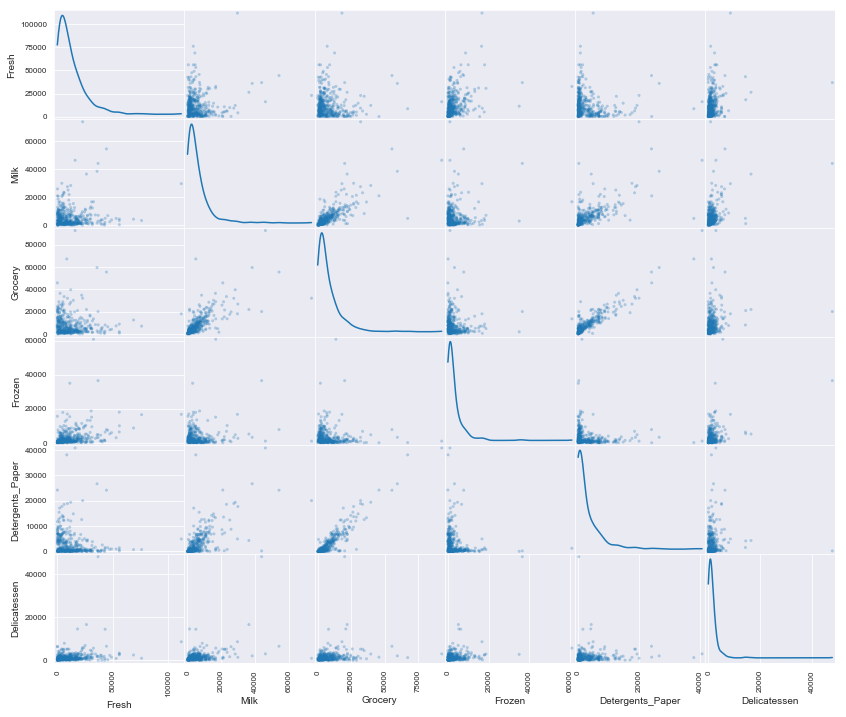

In [14]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,12), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.



In [15]:
# Testing mean greter than median
for i, value in enumerate(data.mean()):
    print(data.mean()[i] - data.median()[i])


3496.2977272727276
2169.265909090909
3195.777272727273
1545.931818181818
2064.9931818181817
559.3704545454545


kernel density estimation (KDE) Plot shows that  Data distribution has a long right tail or positive-skew distribution i.e Mean is greater than the median. Data distribution is not normally distributed i.e. not symmetrical about the mean.

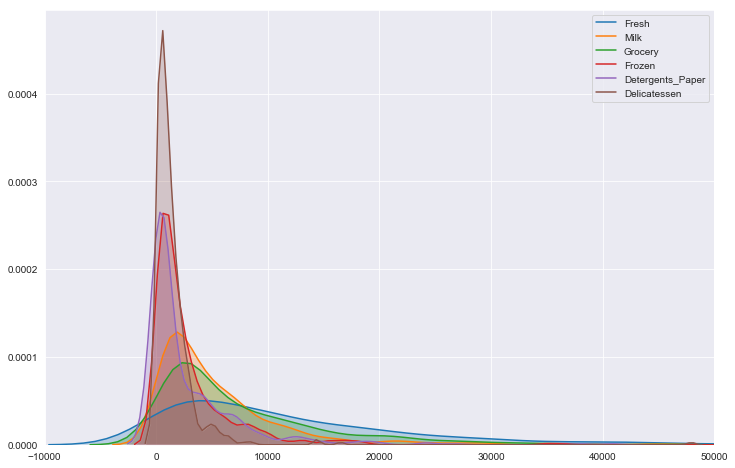

In [16]:
# kernel density estimation (KDE) plot
plt.figure(figsize=(12,8))
for item in data.columns:
    sns.kdeplot(data[item], shade=True)

plt.xlim(-10000, 50000)
plt.savefig("01-kde.png")



* Are there any pairs of features which exhibit some degree of correlation? 

Correlation between 'Detergents_Paper' and 'Grocery' is : 0.9246406908542677.


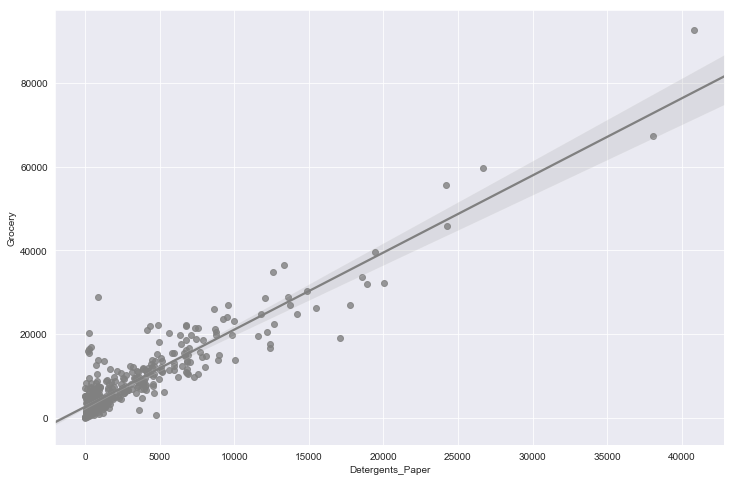

In [17]:

plt.figure(figsize=(12,8))
sns.regplot(x='Detergents_Paper',
           y='Grocery',
           data=data,
           color='gray')

;

print("Correlation between 'Detergents_Paper' and 'Grocery' is : {}.".format(data['Detergents_Paper'].corr(data['Grocery'])))

Correlation between 'Detergents_Paper' and 'Milk' is : 0.6618156793591068.


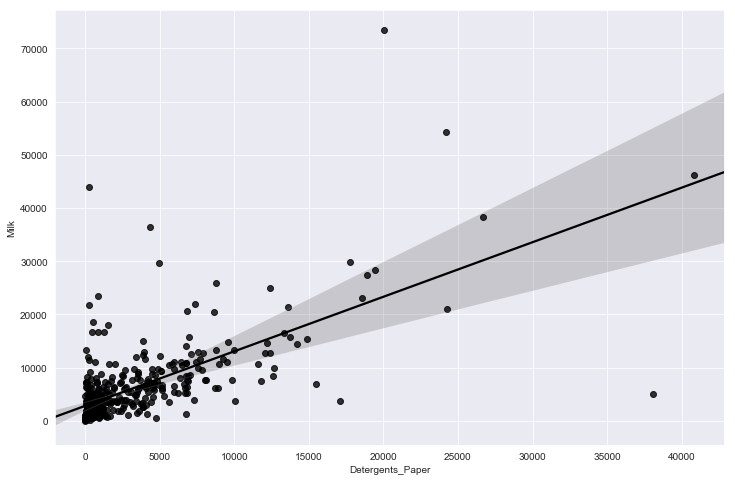

In [18]:
plt.figure(figsize=(12,8))
sns.regplot(x='Detergents_Paper',
           y='Milk',
           data=data,
            color='black'
           )
;


print("Correlation between 'Detergents_Paper' and 'Milk' is : {}.".format(data['Detergents_Paper'].corr(data['Milk'])))

Above:Correlation between 'Detergents_Paper' and 'Milk' is not so strong.

Correlation between 'Grocery' and 'Milk' is : 0.6618156793591068.


''

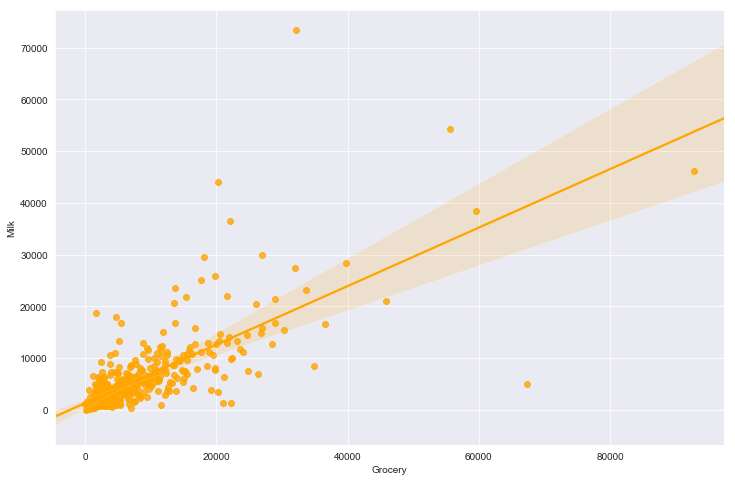

In [19]:
plt.figure(figsize=(12,8))
sns.regplot(x='Grocery',
           y='Milk',
           data=data,
            color='orange'
           )


print("Correlation between 'Grocery' and 'Milk' is : {}.".format(data['Detergents_Paper'].corr(data['Milk'])))

;

Above:Correlation between 'Grocery' and 'Milk' is not so strong.

Correlation between 'Fresh' and 'Grocery' is : -0.011853874984010457.


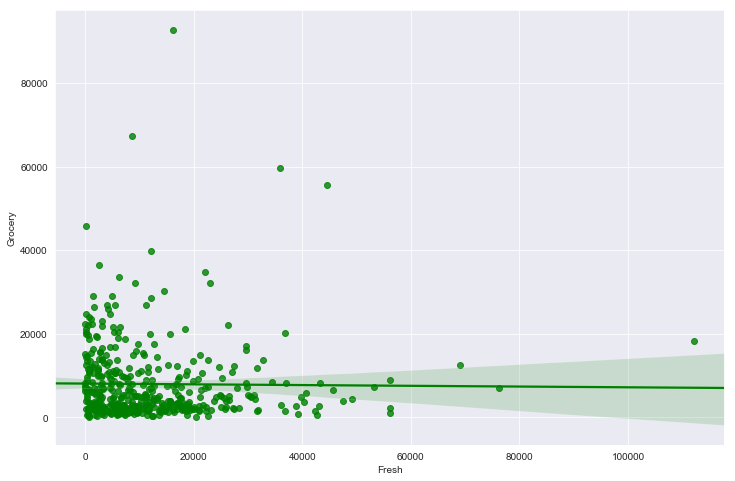

In [20]:
plt.figure(figsize=(12,8))
sns.regplot(x='Fresh',
           y='Grocery',
           data=data,
            color='green'
           )
;


print("Correlation between 'Fresh' and 'Grocery' is : {}.".format(data['Fresh'].corr(data['Grocery'])))

Correlation between 'Fresh' and 'Grocery' is poor.



* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
 

In [21]:
list_features = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicatessen']
for item in list_features:
        print("Correlation between 'Fresh' and '{0}' is : {1:.3f}.".format(item, data['Fresh'].corr(data[item])))


Correlation between 'Fresh' and 'Milk' is : 0.101.
Correlation between 'Fresh' and 'Grocery' is : -0.012.
Correlation between 'Fresh' and 'Frozen' is : 0.346.
Correlation between 'Fresh' and 'Detergents_Paper' is : -0.102.
Correlation between 'Fresh' and 'Delicatessen' is : 0.245.


Feature 'Fresh' does not have strong coralation with other features thus confirms the suspicions about the feature relevance.

''

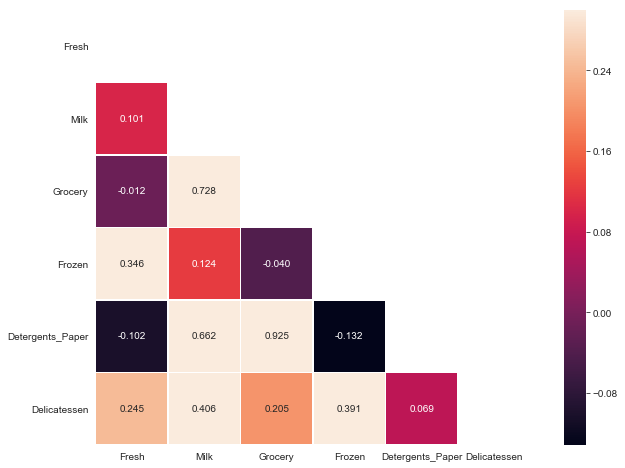

In [22]:
# Addinally we plot heatmap to see correlation

plt.figure(figsize=(12,8))
# computing correlations
data_corr = data.corr()

# Excluding duplicate correlations by masking uper right values
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Add diverging colormap
#cmap = sns.diverging_palette(10, 250, as_cmap=True)

with sns.axes_style("white"):
    sns.heatmap(data_corr,
            annot=True,
            mask=mask,
            square=True,            
            linewidths=.5,
            vmax=.3,
            fmt=".3f"
             
            )

;

Above heatmap show feature 'Detergents_Paper' have a strong correlation with feature ' Grocery'.

 
* How is the data for those features distributed?


Below histogram plot suggest that data is  positively skewed. Data is not normally distributed. 

''

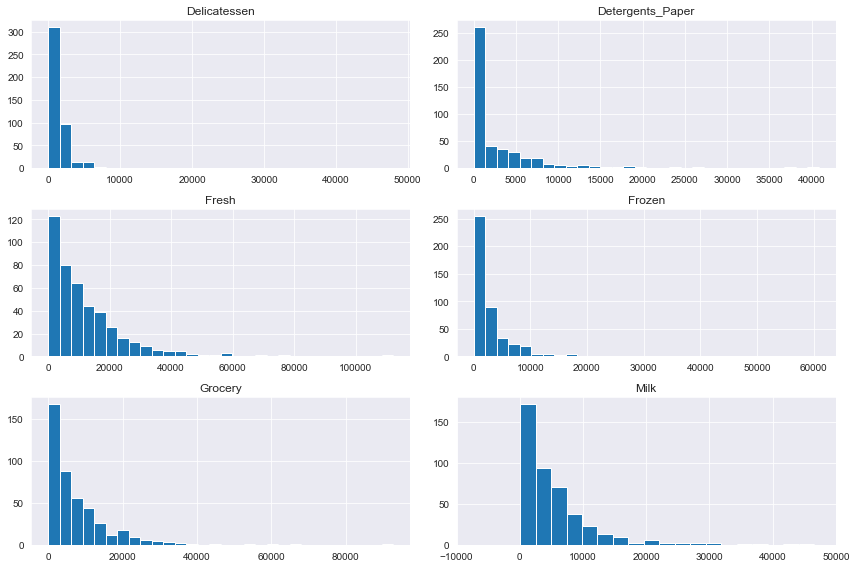

In [23]:
# histogram 

data.hist(bins=30,
          figsize=(12,8),
          density=False)


plt.xlim(-10000, 50000)
plt.tight_layout()
;

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

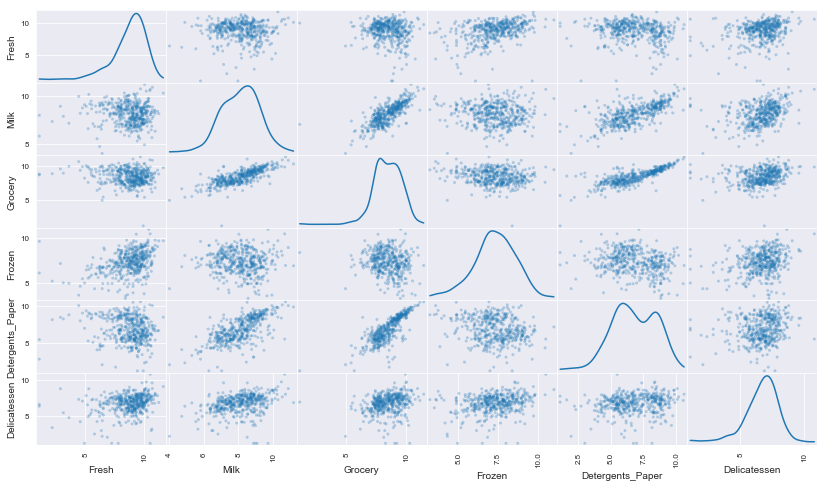

In [24]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [25]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128


''

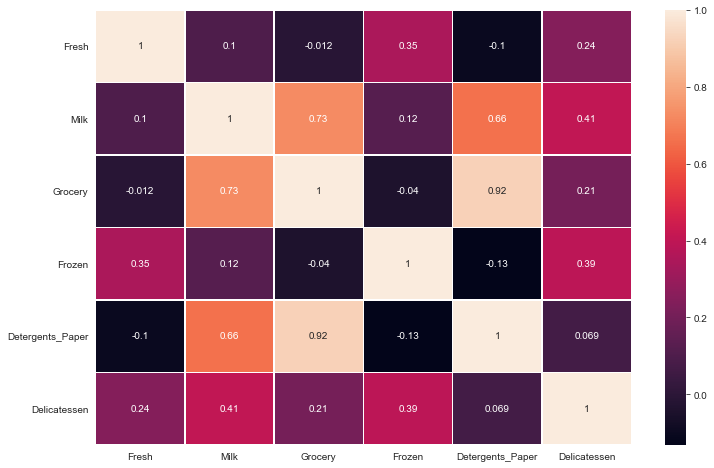

In [26]:
plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),
            annot=True,
           linewidths=.5)
;

#### Observations
  - Correlation between 'Grocery'  and  'Detergents_Paper' is reduced from 0.92 to 0.8.
  - Correlation between 'Grocery'  and  'Milk' is slightly increased from 0.73 to 0.76.
  - Correlation between 'Detergents_Paper'  and  'Milk' is slightly decreased from 0.66 to 0.68.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [27]:
# For each feature find the data points with extreme high or low values


list_total_outliers = []
 


for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outlier_record = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    display(outlier_record)
    
    list_total_outliers.append(outlier_record.index.tolist())
    

# combine list of list
[ j for i in list_total_outliers for j in i ]

# removing duplicate
set([ j for i in list_total_outliers for j in i ])


    
# OPTIONAL: Select the indices for data points you wish to remove

# Randomly choosing 5 indices from outliers
import random
outliers = random.sample(set([ j for i in list_total_outliers for j in i ]), 5)



# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# printing good data with 5 outlier records removed
print("\nGood data with 5 outliers removed.")
print("\nOrginal data dimension was {} and   \n Good data dimension is {}.".format(data.shape, good_data.shape))
print(good_data)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



Good data with 5 outliers removed.

Orginal data dimension was (440, 6) and   
 Good data dimension is (435, 6).
         Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0     9.446913   9.175335   8.930759  5.365976          7.891331      7.198931
1     8.861775   9.191158   9.166179  7.474205          8.099554      7.482119
2     8.756682   9.083416   8.946896  7.785305          8.165079      8.967504
3     9.492884   7.086738   8.347827  8.764678          6.228511      7.488853
4    10.026369   8.596004   8.881558  8.272571          7.482682      8.553525
5     9.149847   9.019059   8.542081  6.501290          7.492760      7.280008
6     9.403107   8.070594   8.850088  6.173786          8.051978      6.300786
7     8.933137   8.508354   9.151227  7.419980          8.108021      7.850104
8     8.693329   8.201934   8.731013  6.052089          7.447751      6.620073
9     8.700514   9.314070   9.845911  7.055313          8.912608      7.648740
10    8.121480   

In [28]:
print("Original data shape : {}.".format(data.shape))
print("Good data shape     : {}.".format(good_data.shape))

Original data shape : (440, 6).
Good data shape     : (435, 6).


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 


**Answer:**

Below code snippet show duplicate indices for more than one feature from outliers list.

In [29]:
# print duplicate outliers element
from collections import Counter
[k for k,v in Counter([ j for i in list_total_outliers for j in i ]).items() if v>1]


[65, 66, 128, 154, 75]

* Should these data points be removed from the dataset? 
    - These outlier data points should be removed from the dataset as they are coming from multiple feature's categories.
 


* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Incorrect typed or measured data can be removed.


k-means objective assumes that all of the points can be naturally partitioned into distinct clusters, which is often an unrealistic assumption in practice.  Real-world data typically has noise and the k-means method is extremely sensitive to it.  Noise can drastically change the quality of the clustering solution and it is important to take this into account
in designing algorithms for the k-means objective.

Reference:
- http://theory.stanford.edu/~sergei/papers/vldb17-km.pdf



In [30]:
# outliers indexes
outliers = set([ j for i in list_total_outliers for j in i ])
outliers = [ int(x) for x in outliers] # converting into int

# removing outliers from log_data
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [31]:
good_data.shape

(398, 6)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

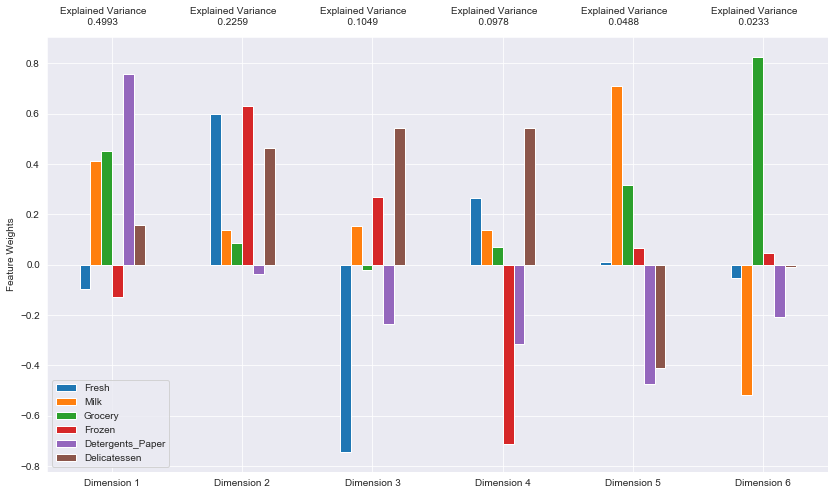

In [32]:
from sklearn.decomposition import PCA

n_features = len(good_data.columns)

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=n_features).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [33]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


In [34]:
# calculating cummulative sum
pca_results['Explained Variance'].cumsum()

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

In [35]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [36]:
number = len(pca_results['Explained Variance'].cumsum())

for i in range(number):
    a = pca_results['Explained Variance'].cumsum()[i]
    print("The variane of first {0} PCA component is {1:0.2f}%.".format(i+1,a*100))
   

The variane of first 1 PCA component is 49.93%.
The variane of first 2 PCA component is 72.52%.
The variane of first 3 PCA component is 83.01%.
The variane of first 4 PCA component is 92.79%.
The variane of first 5 PCA component is 97.67%.
The variane of first 6 PCA component is 100.00%.


''

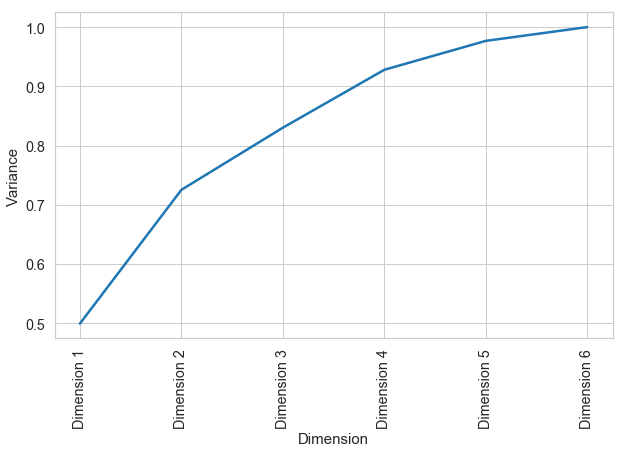

In [37]:
# ploting the variance chart
sns.set_style('whitegrid')

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,6))
plt.plot(pca_results['Explained Variance'].cumsum())

plt.xlabel('Dimension', fontsize = 15 )
plt.ylabel('Variance', fontsize = 15 )
plt.xticks(rotation=90)

;


As the dimensions increases so is the variance.

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 

   

* How much variance in the data is explained by the first four principal components? 

 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

**<i>  How much variance in the data is explained "in total" by the first and second principal component?  </i>**
   - First and second principal component shows a total variance of 72.52%.
   
   **<i>  How much variance in the data is explained by the first four principal components?  </i>**
   
   - First and four principal component shows a total variance of 92.79%..
   
   **<i>  Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.</i>**
   
  1. 
        - The first principal component shows a mild negative correlation with "Fresh" and "Frozen".  
        - The first principal component has a strong positive correlation to  'Detergents_Paper', 'Grocery', 'Milk' and low positive correlation to 'Delicatessen' items. 
          
          Where a first principal component has a strong positive  correlation it may represent a big spender customer type like  'Big Retailer' and on the other side where the principal component has a  mild negative correlation, it may represent not so big spender customer type like  'Restaurants' or 'Cafes'.  
          
          
 
 2. 
    - The second principal component shows a strong positive correlation with items like  "Frozen", "Fresh",  'Delicatessen',  and mild positive correlation with items like  'Milk' and Grocery'.
    - The second principal component shows a mild negative correlation with the item 'Detergents_Paper'.

         Intuitively,  I think,  the second principal component shows a strong positive correlation with almost all items - it could be a big spender customer type like  'Big Retailer'.
         
      
 
 3. 
     - The third principal component shows a not so strong positive correlation with 'Delicatessen' products, moderate positive correlation with 'Frozen' products and a mild positive correlation with 'Milk.
     - The third principal component also shows a strong negative correlation with 'Fresh' and 'Detergents_Paper'.
     
         Where a third principal component has a strong positive it may represent a moderate spender customer type like  'Deli' and on the other side where the third principal component has a  strong negative correlation, it may represent a customer who buys lots of 'Fresh' produce and relatively not so much  'Detergents_Paper'.  It could be a shop who caters exclusively to vegetarians.
 
 
 
 
 4.  
     - The fourth principal component shows a strong negative correlation with "Frozen" and  'Detergents_Paper'.
     - The fourth principal component has a strong positive correlation to item 'Delicatessen' and mild positive correlation to items   'Fresh', 'Milk' and 'Grocery'.
       
       Where a fourth principal component principal component has a strong negative correlation it may represent a not so big spender customer type like  'Deli' and on the other side where the principal component has a  mild positive correlation, it may represent not so big spender customer type like  'Restaurants' or 'Cafes'.  
 
   
   
   
   
   
   




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [38]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.4809,0.8020,-1.2612,0.2571,1.3043,-0.7119
1,2.6240,4.4608,-0.2695,0.1618,0.4241,-0.3959
2,1.1180,4.2872,1.0017,-0.9866,0.8195,0.0756


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [39]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

reduced_data.head()

,Dimension 1,Dimension 2
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314


In [40]:
# shape
reduced_data.shape

(398, 2)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [41]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,4.4809,0.8020
1,2.6240,4.4608
2,1.1180,4.2872


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

''

<Figure size 1152x720 with 0 Axes>

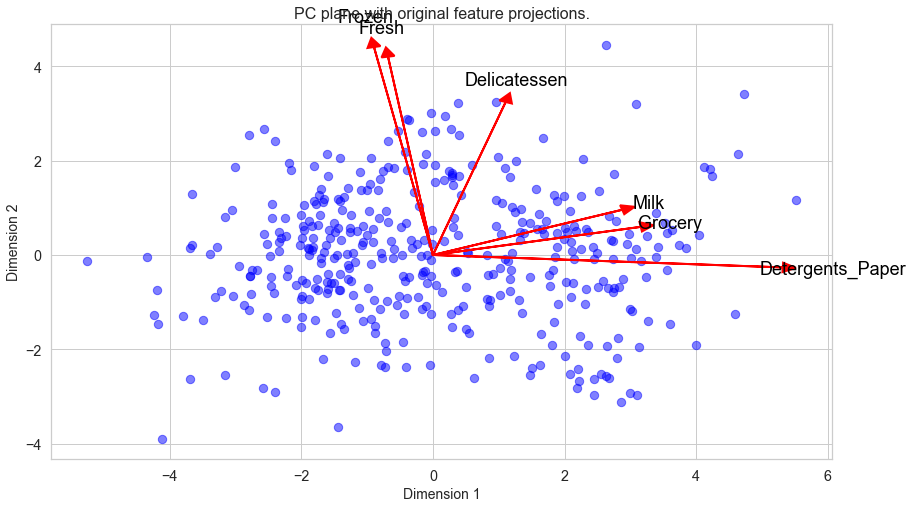

In [42]:
# Create a biplot

plt.figure(figsize=(16,10))
vs.biplot(good_data, reduced_data, pca)
;

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


### Bioplot interpretation
  - Above, Biplot show the projection of data on two Principal component(Dimension 1 = PC1 and Dimension 2 = PC2) where variance is the highest.
  - Vectors of 'Detergents_Paper', 'Grocery','Milk','Delicatessen','Fresh', and 'Frozen' are pinned at the origin Principal component(Dimension 1 = PC1=0 and Dimension 2 = PC2=0).
  - Projected values of vectors 'Detergents_Paper', 'Grocery','Milk','Delicatessen','Fresh', and 'Frozen' show how much weight they have on each Principal component
  - Vectors of 'Detergents_Paper', 'Grocery', and 'Milk' strongly influence 'Dimension 1 = PC1=0'
  - Vectors of 'Delicatessen','Fresh', and 'Frozen' strongly influence 'Dimension 2 = PC2=0'



#### Refrence:
- https://stats.stackexchange.com/questions/73286/interpretation-of-pca-biplot
- https://stats.stackexchange.com/questions/2038/interpretation-of-biplots-in-principal-components-analysis


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**


#### Advantages | K-Means clustering algorithm
- K-means, an unsupervised machine learning model, is Hard labelling cluster method 
- K-means is easy to implement 
- K-mean is linear in the number of data objects i.e. O(n), where n is the number of data objects – thus relatively less computationally expensive in comparison to Gaussian Mixture Model.
- K-means works best when shape of clusters are hyper-spherical

#### Disadvantages | K-Means clustering algorithm
- Lack of flexibility in cluster shape.
- Lack of probabilistic cluster assignment. 
- K-means starts with a random choice of cluster centers; therefore, it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. 
- K-means not a good choice of non-spherical dataset.


#### Advantages | Gaussian Mixture Model  clustering algorithm
- Gaussian Mixture is soft clustering i.e. sample membership of multiple clusters
- Cluster shape flexibility (No assumption on clusters geometry) i.e. works well with non-linear geometric distributions as well.
-  Does not bias the cluster sizes to have specific structures




#### Disadvantages | Gaussian Mixture Model  clustering algorithm
- Sensitive to initialization values. Initialization of clusters will be difficult when dimensionality of data is high.
- Possible to converge to a local optimum.
- Slow convergence rate.

####  Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?


- I would choose the Gaussian mixture model.
- From the above scatter matrix plot it appears that there are no clear cut clusters in the dataset thus relying on GMM.  



Refrence:
- https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
- https://www.quora.com/What-is-an-intuitive-explanation-of-Gaussian-mixture-models
    

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [43]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data

list_scores = []

for n in range(2,15):
    clusterer = GaussianMixture(n_components=n, random_state=0).fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    list_scores.append(round(score, 2))
    
    print("Cluster number {0}, Silhouette score is {1:.2f}.".format(n, score))

Cluster number 2, Silhouette score is 0.45.
Cluster number 3, Silhouette score is 0.35.
Cluster number 4, Silhouette score is 0.32.
Cluster number 5, Silhouette score is 0.31.
Cluster number 6, Silhouette score is 0.34.
Cluster number 7, Silhouette score is 0.25.
Cluster number 8, Silhouette score is 0.32.
Cluster number 9, Silhouette score is 0.34.
Cluster number 10, Silhouette score is 0.32.
Cluster number 11, Silhouette score is 0.33.
Cluster number 12, Silhouette score is 0.30.
Cluster number 13, Silhouette score is 0.32.
Cluster number 14, Silhouette score is 0.31.


''

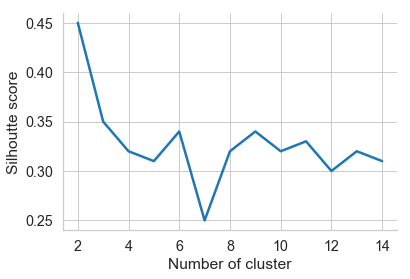

In [44]:
# plotting "Number of components" Vs. "Silhoutte score"
list_cluster_number = list(range(2,15))
plt.plot(list_cluster_number, list_scores)
plt.xlabel("Number of cluster")
plt.ylabel("Silhoutte score")

sns.despine()
;


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

In [45]:
df_silhoutte_score =pd.DataFrame({'number_of_cluster':list_cluster_number,
                     'silhoutte_score':list_scores})

df_silhoutte_score.loc[df_silhoutte_score['silhoutte_score'].idxmax()]

number_of_cluster    2.00
silhoutte_score      0.45
Name: 0, dtype: float64

**Answer:**

Cluster number 2 has the best Silhouette score of 0.42.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [46]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data
n = 2
clusterer = GaussianMixture(n_components=n, random_state=0).fit(reduced_data)
    
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
  
# TODO: Find the cluster centers
centers = clusterer.means_
    
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
    
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

    

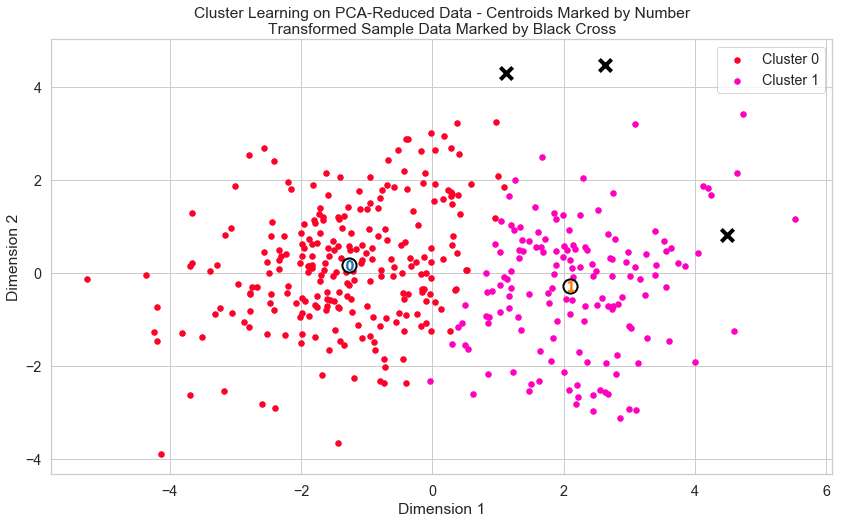

In [47]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [48]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


In [49]:
# statistical description
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [50]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


In [51]:
true_centers_02 = true_centers.append(data.describe().loc['mean'])

''

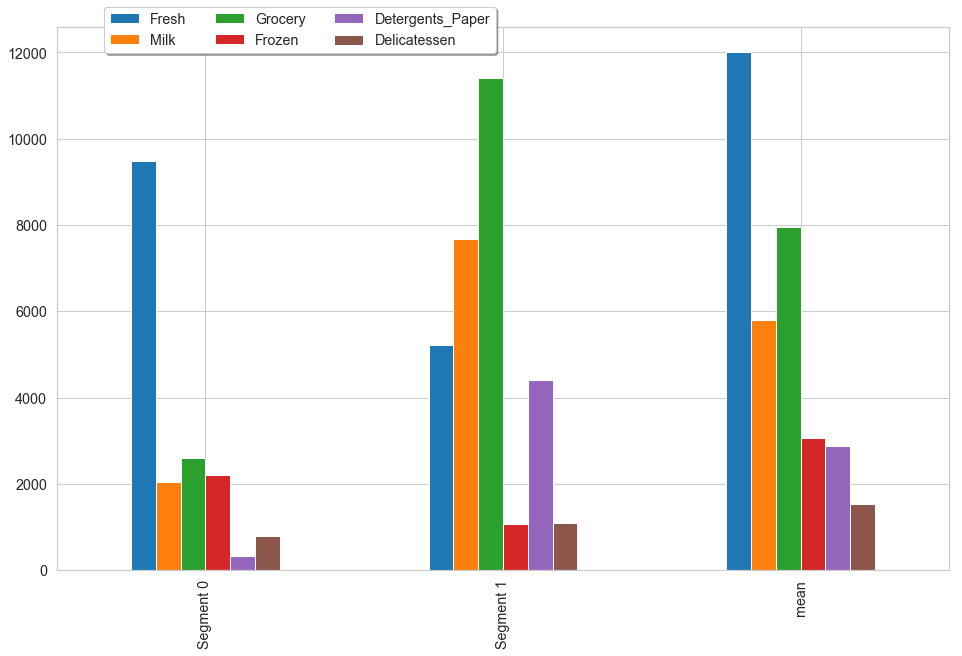

In [52]:
# plot for easy comparison plot 

sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
true_centers_02.plot(kind='bar', figsize=(16,10))
plt.legend(loc='left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

;

In [53]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


**Answer:**

'Segment 0'  and 'Segment 1' represents two types of wholesale customers' who buy from a wholesale distributor.

- 'Segment 0' type customer represents who buy items 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'   which are below mean. This could be an establishment of type small neighboorhood market, restaurants, cafe or  Deli store.
    - As bar plot above is positively skewed - it may mean that a few customers are buying a lot of 'Fresh' produce versus other items.

- 'Segment 1' type customer represents who buy items 'Milk', 'Grocery', 'Detergents_Paper' above mean and items 'Fresh', 'Frozen', and 'Delicatessen' below mean. This could be an establishment of type big Superstores. 
    - As bar plot above is positively skewed - it may mean that a few customers are buying a lot of 'Grocery' and 'Milk' versus other items.




### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [54]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


In [55]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22925,73498,32114,987,20070,903
1,112151,29627,18148,16745,4948,8550
2,32717,16784,13626,60869,1272,5609


In [56]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

### Old Interpretation. 

#### First sample customer:
   - This could be Coffee shop as its annual spending monetary units on 'Milk' and 'Grocery' is above mean and at the same time spending on 'Fresh', 'Frozen' and 'Delicatessen' less than mean.


#### Second sample customer:
   - This could be big Supercenter store as its annual spending monetary units on 'Fresh' and 'Delicatessen'  is above mean and at the same time spending on  'Milk' 'Frozen'  and Grocery close to mean.


#### Third sample customer:
   - This could be Deli shop as its annual spending monetary units on 'Frozen', 'Delicatessen' are above mean and close to average(below) spending on  ''Milk' and 'Grocery' and 'Delicatessen' including 'Detergents_Paper'. It is like a small neighborhood store where one can buy almost all items. 


### New Interpretation. 

#### Sample point 0: represent Superstore(a large establishment)
Prediction consistency: False. Predicted Coffee shop - a small establishment. This sample point may be at the boundary and misclassified.


#### Sample point 1: represent Superstore(a large establishment)
Prediction consistency: True. Predicted Supercenter shop - a large establishment. 


#### Sample point 2: neighboorhood market( a small establishment)
Prediction consistency: True. Predicted Deli shop - a small establishment. 






## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**


The reason wholesale distributor want to change delivery service from currently 5 days a week to 3 days a week because the delivery trucks were not utilized(filled) up to full capacity for some customers or unoptimized driving routes( high traffic fuel and labor time wastage ). 
As a first step, the wholesale distributor should choose customers group where delivery is inefficient. 

From that customer's group, the distributor should focus on 'Segment 0'(small establishment)   and run A/B test.  Intuitively, I think,  it is not a good idea to irk large establishment at first. 

Group A: 'Segment 0' | Control -  Default 5 days delivery service
Group B: 'Segment 0' | Variation -  Default 5 days delivery service  

Evaluate feedback from customer " Group B: 'Segment 0' | Variation " to determine if the experience is positive(1) or negative(0). 

At the end of A/B testing if there are more '1' than '0' -  the wholesale distributor may consider gradually changing delivery service from currently 5 days a week to 3 days a week and extend later to 'Segment 1' customers. At the same time, constant feedback from customers is important to adjust accordingly.


Reference: 
- https://www.optimizely.com/optimization-glossary/ab-testing/
- https://www.abtasty.com/blog/learn-from-5-ab-test-case-studies/
- https://www.designforfounders.com/ab-testing-examples/

   
   
   
   

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Assuming  the wholesale distributor know  anticipated annual spending of each product category for recently acquired ten new customers, the distributor can classify 'customer_segment' as 
- small-market customer
- mid-market customer
- super-market customer

for appropriate delivery service. 

Now we can train supervised learner(like logistics, K nearest neighbor etc. )  on features 'anticipated annual spending" and target variable 'customer_segment' to predict type of appropriate delivery service. 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

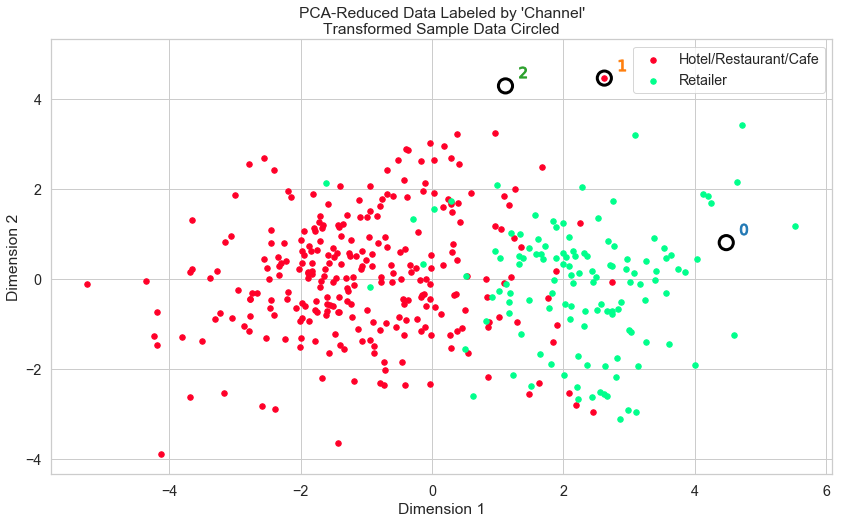

In [57]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

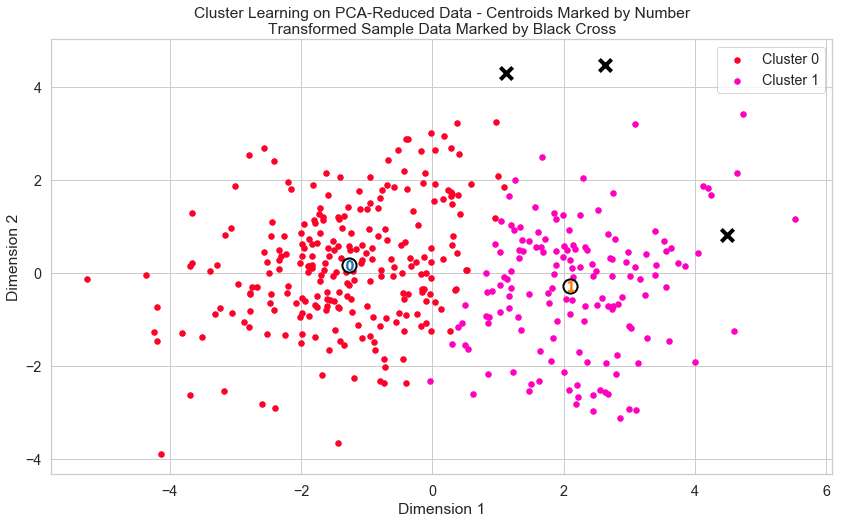

In [58]:
# Display the results of the clustering from implementation| number of cluster=2
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?
    - Clustering method where we chose two clusters loosely matches the distribution of 'Hotel/Restaurant/Cafe customers' and 'Retailer' customers. I do see a number of red points intermingly with green points i.e 'Retailer' customers. 




* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
    - 'Segment 0'  customers can be identified as   'Hotel/Restaurant/Cafe customers' customers aka big establishment.
    - 'Segment 1'   customers can be identified as    'Retailer' customers aka small establishment.




* Would you consider these classifications as consistent with your previous definition of the customer segments?
    - I would consider classifications' Hotel/Restaurant/Cafe customers'  and  'Retailer' customers consistent with the previous definition of the customer segments i.e. 'Segment 0' and 'Segment 1'.
    



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.